In [2]:
import pandas as pd

# Load the Excel file
file_path = '../data/luiss_data_anonym.xlsx' # Update this path
df = pd.read_excel(file_path)

In [3]:
# First of all, delete all rows for which IvaM is missing, because we need to predict this:
df = df[~df.IvaM.isna()]

# Calculate number of NaNs per column
nans_per_column = df.isnull().sum()

# Calculate percentage of NaNs per column
percentage_nans_per_column = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for a cleaner display
nans_df = pd.DataFrame({'Number of NaNs': nans_per_column, 'Percentage of NaNs': percentage_nans_per_column})

print(nans_df)

                 Number of NaNs  Percentage of NaNs
Unnamed: 0                    0            0.000000
A                             0            0.000000
Ateco                         0            0.000000
B                            54            0.040309
C                        125230           93.478942
DataDoc                       0            0.000000
D                             1            0.000746
E                        132175           98.663094
F                        132175           98.663094
G                        133948           99.986564
H                        133948           99.986564
Tdoc                          0            0.000000
VA                            0            0.000000
CE                       131878           98.441396
DescrizioneRiga             905            0.675545
Importo                       0            0.000000
Iva                           0            0.000000
Conto                         0            0.000000
ContoStd    

**We now can identify three groups of columns:**

1. Columns with no missing values
2. Columns with a small percentage of missing values (<5%)
3. Columns with a large percentage of missing values (>50%)

_Note no cases between 2. and 3._

Before deleting rows or columns we have to ask two questions:

- does the presence of a values in a column with many NaNs provide a lot of predictive power? This way we could use empty values
- is the column with few NaNs valuable enough to apply a data imputation technique?

This should be determined per column:

- ...


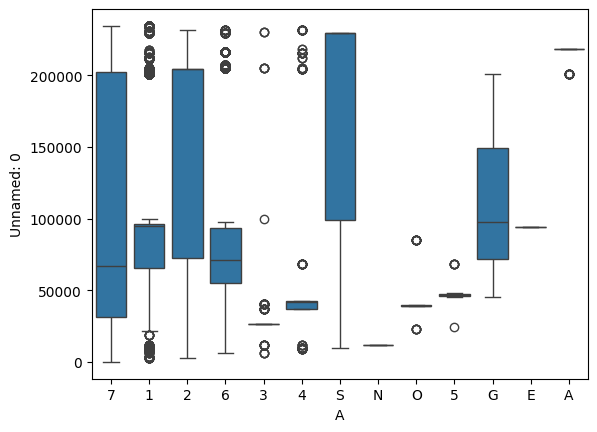

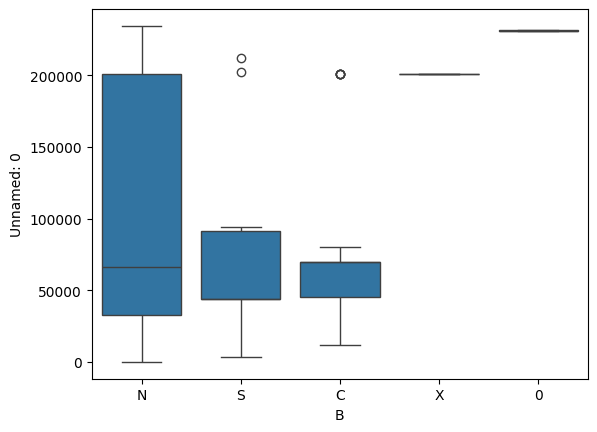

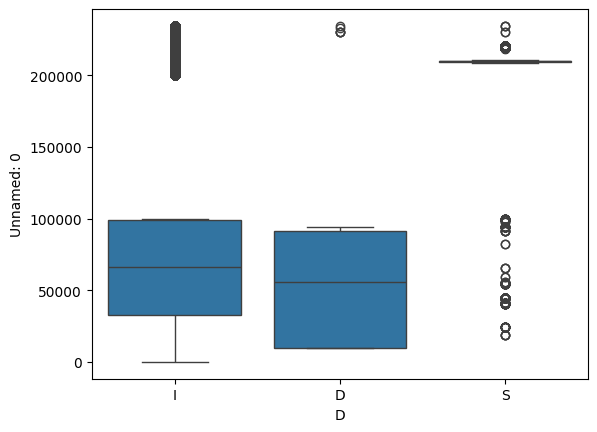

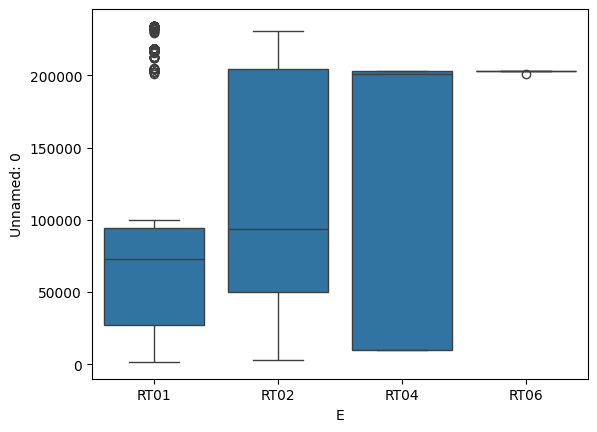

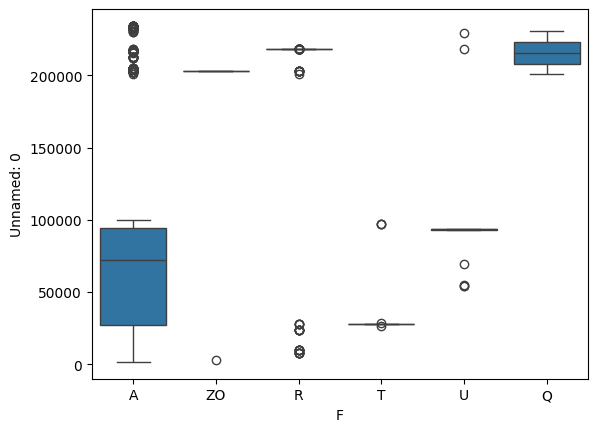

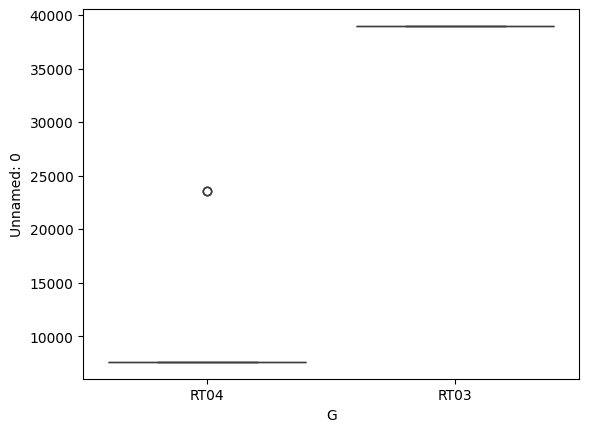

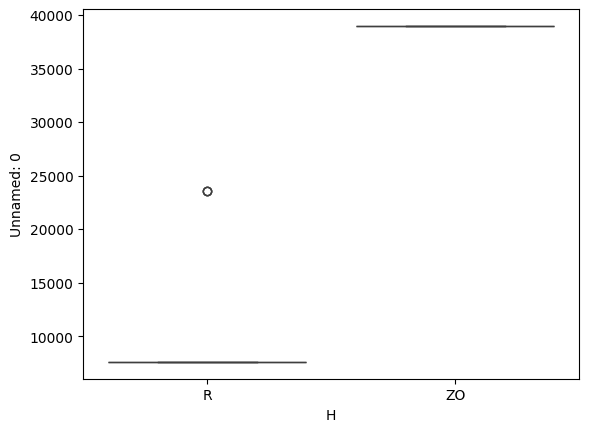

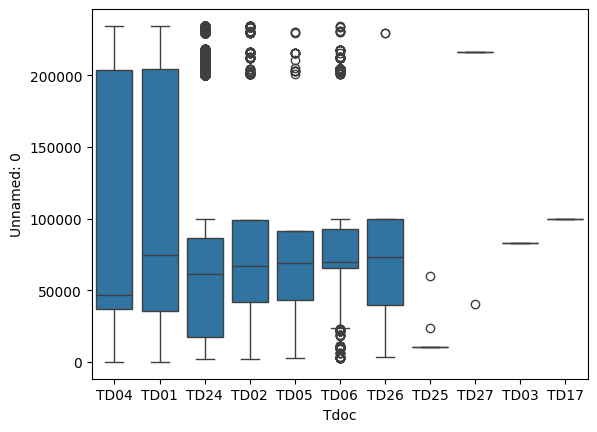

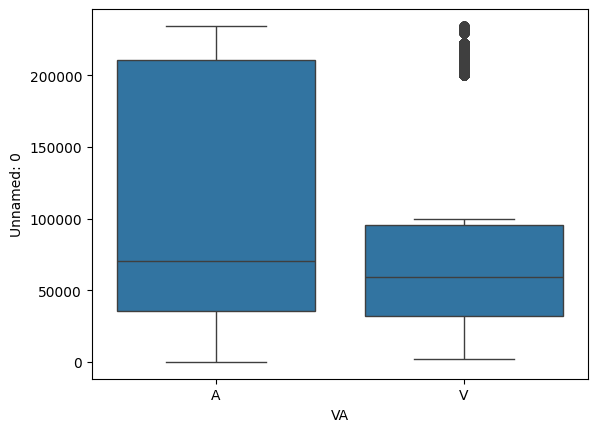

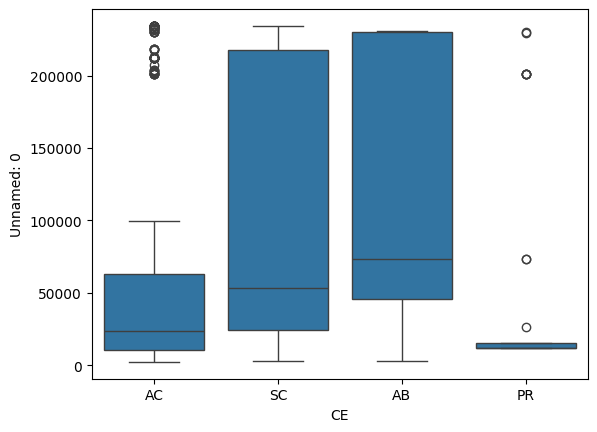

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Function to plot for Numerical vs. Numerical
def plot_numerical_vs_numerical(col1, col2):
    sns.scatterplot(x=col1, y=col2, data=df)
    plt.show()

# Function to plot for Numerical vs. Categorical
def plot_numerical_vs_categorical(num_col, cat_col):
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.show()

# Function to plot for Categorical vs. Categorical
def plot_categorical_vs_categorical(cat_col1, cat_col2):
    ct = pd.crosstab(df[cat_col1], df[cat_col2])
    ct.plot(kind='bar', stacked=True)
    plt.ylabel('Count')
    plt.show()

# Example of how to iterate and automatically select which analysis to perform
# Note: This is a simplified example. In practice, you may want to limit the number of plots for large datasets.

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plot_numerical_vs_categorical(num_col, cat_col)

for i, cat_col1 in enumerate(categorical_cols):
    for cat_col2 in categorical_cols[i+1:]:  # Avoid repeating pairs
        plot_categorical_vs_categorical(cat_col1, cat_col2)

# For numerical vs numerical, considering plotting only a subset due to potential large number of combinations
for i, num_col1 in enumerate(numerical_cols):
    for num_col2 in numerical_cols[i+1:]:
        plot_numerical_vs_numerical(num_col1, num_col2)

In [8]:
import pandas as pd
import numpy as np 

df = pd.read_excel('../data/luiss_data_anonym.xlsx')

summary_stats = df.describe()
print(summary_stats)


          Unnamed: 0          Ateco            C  \
count  134437.000000  134437.000000  8757.000000   
mean    92883.393783  471724.595521    85.027863   
min         1.000000   11110.000000     1.000000   
25%     33640.000000  432101.000000   100.000000   
50%     67249.000000  471920.000000   100.000000   
75%    200892.000000  479110.000000   100.000000   
max    234501.000000  960909.000000   100.000000   
std     77319.811350  185302.130522    31.185055   

                             DataDoc       Importo         Conto  \
count                         134437  1.344370e+05  1.344370e+05   
mean   2022-06-13 12:00:02.249380352  8.322071e+02  5.791699e+06   
min              2020-01-09 00:00:00 -4.597515e+05  6.001000e+04   
25%              2021-10-01 00:00:00  1.017000e+01  5.805125e+06   
50%              2022-08-31 00:00:00  3.800000e+01  5.810005e+06   
75%              2023-03-28 00:00:00  2.220000e+02  6.625015e+06   
max              2023-09-29 00:00:00  4.000000e+06  9.9

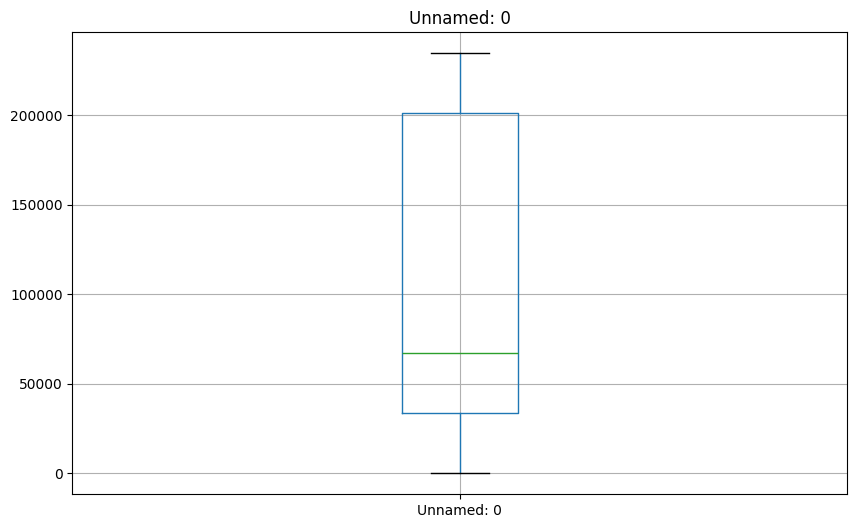

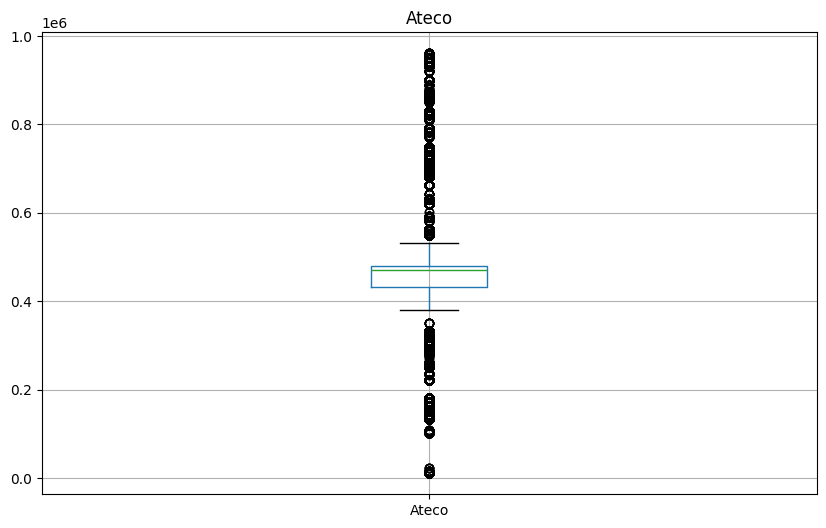

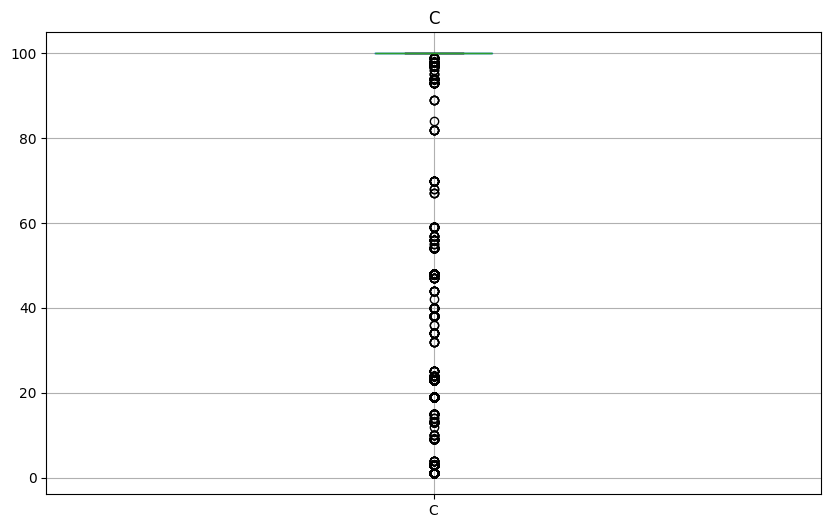

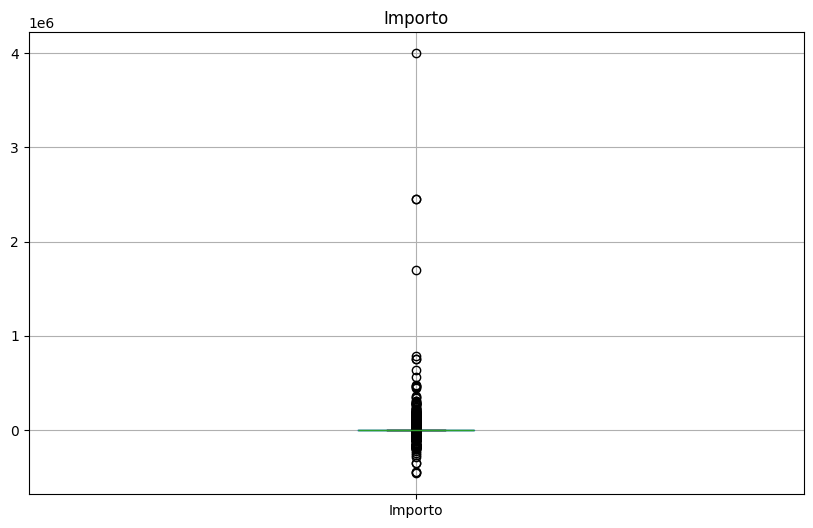

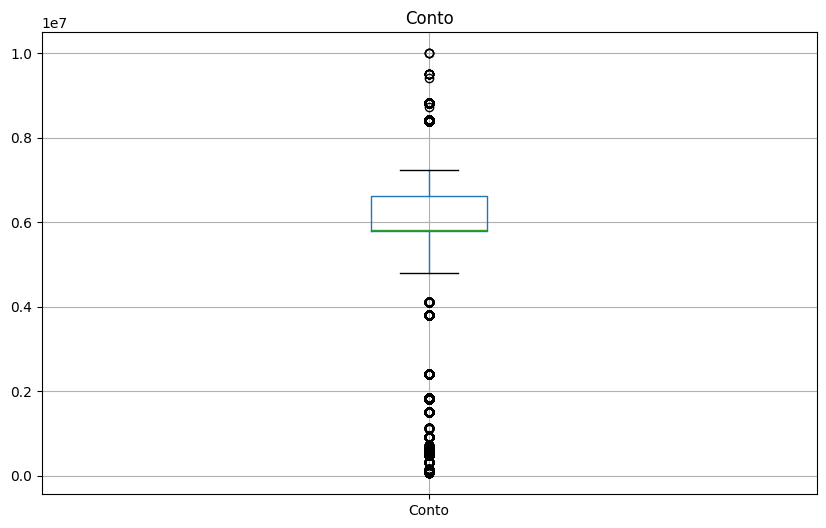

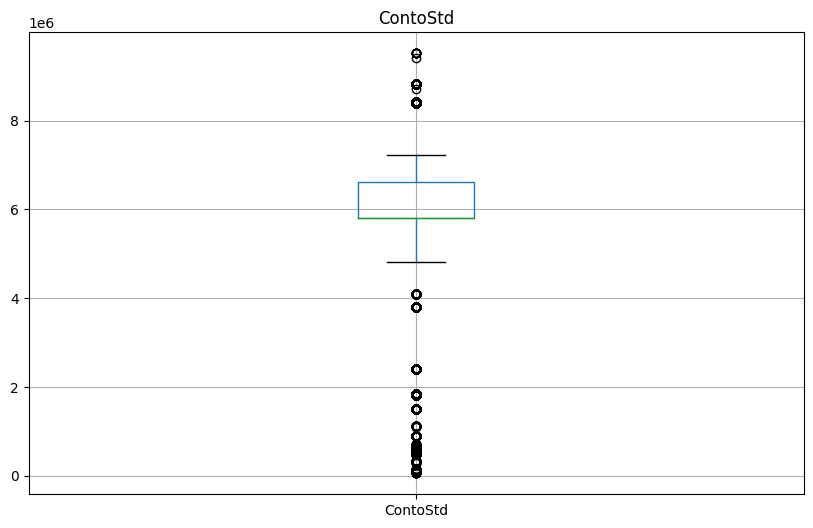

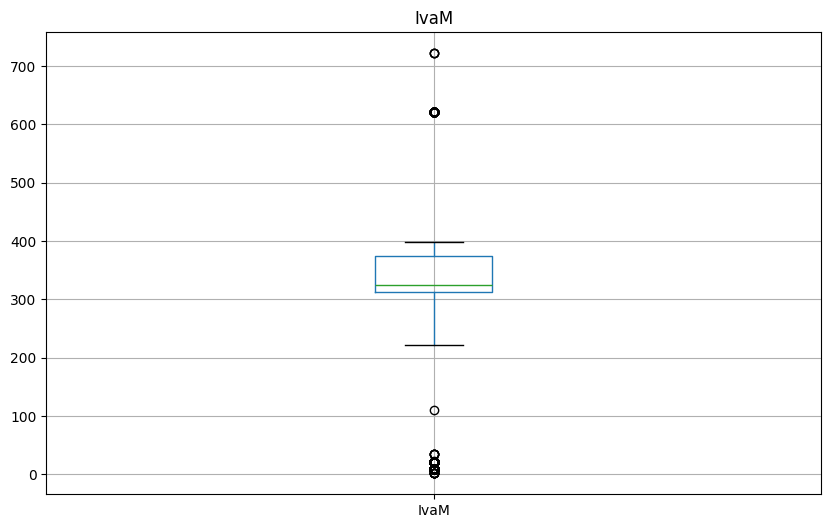

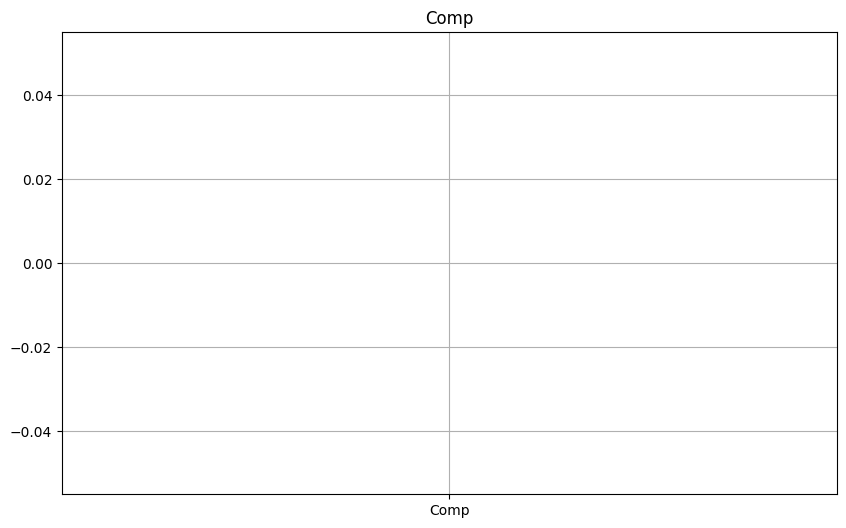

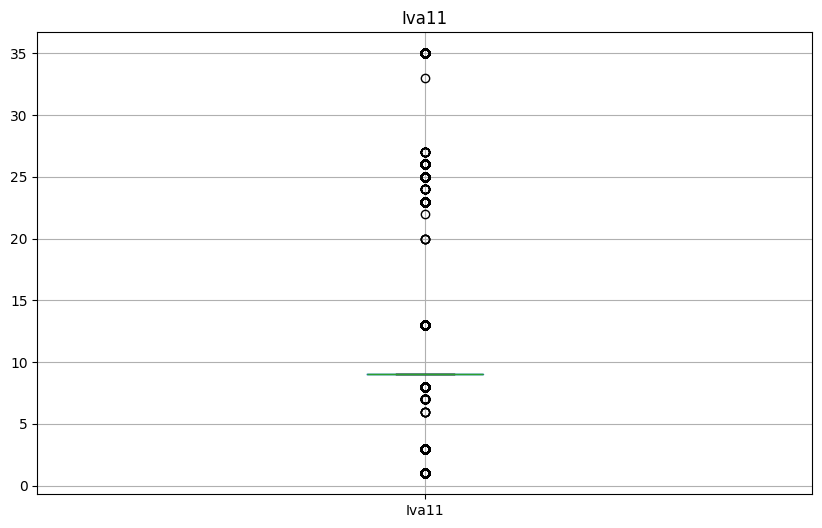

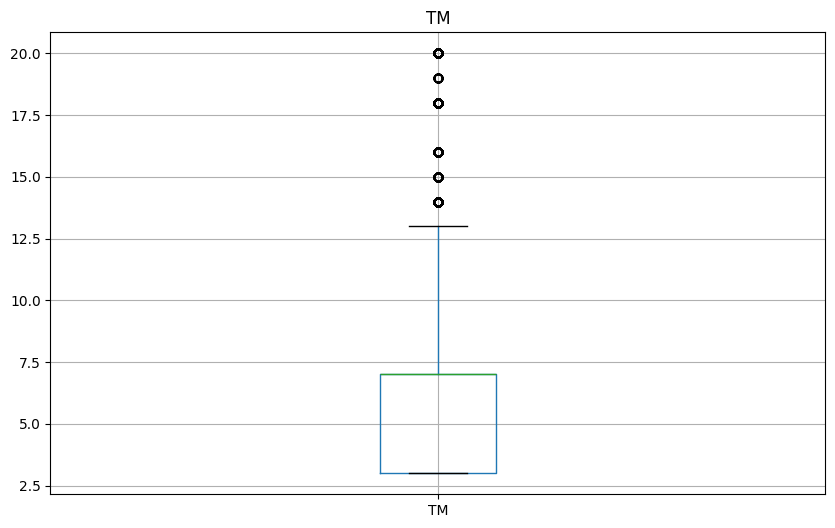

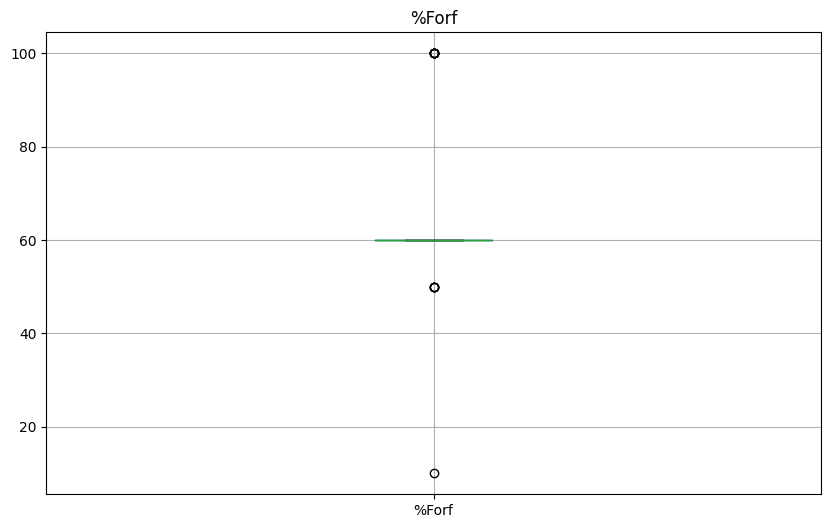

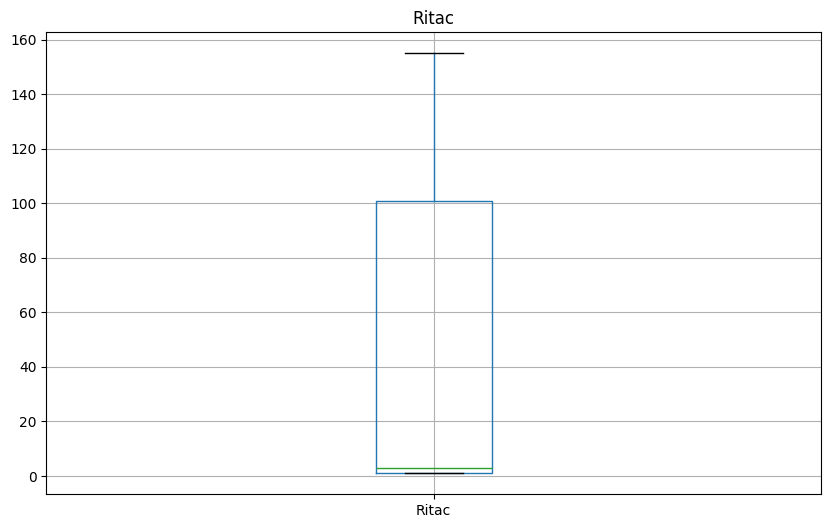

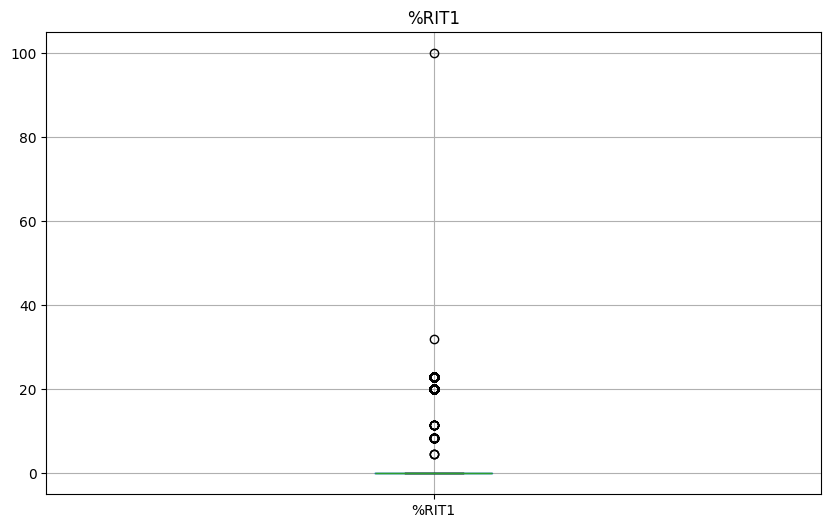

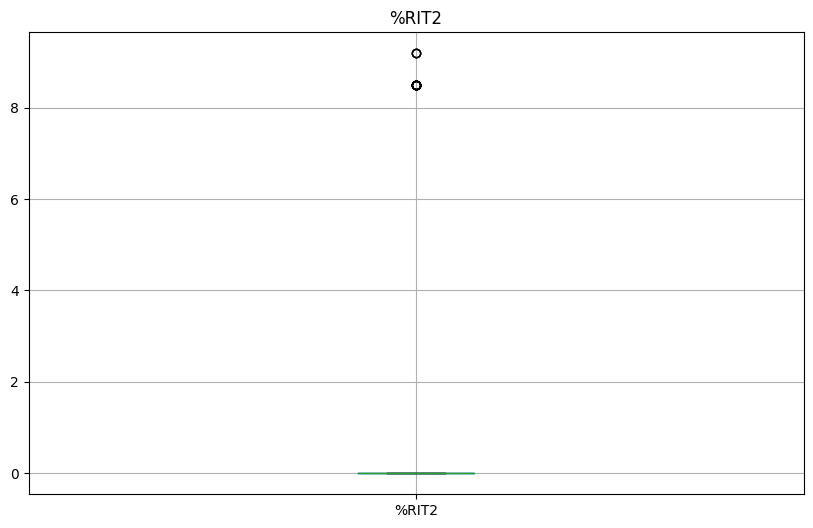

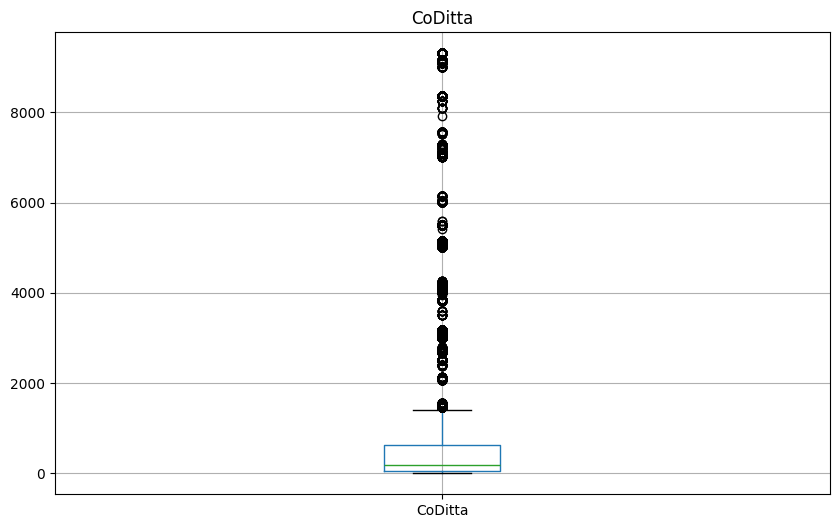

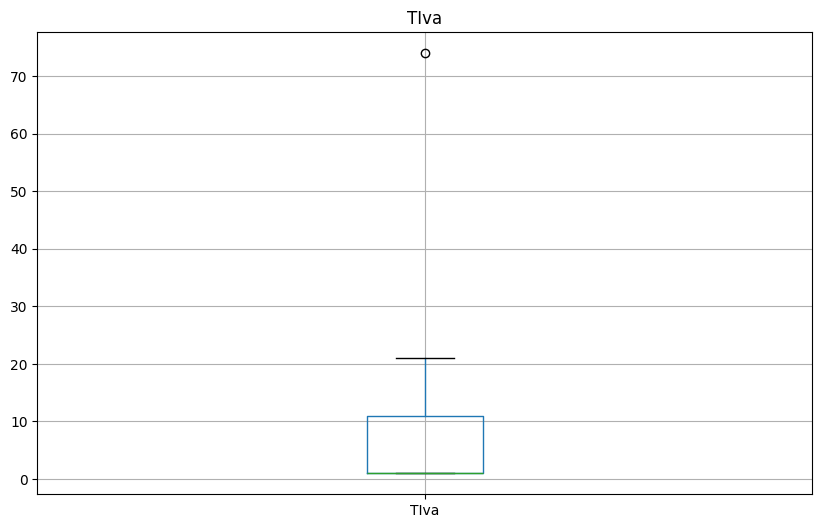

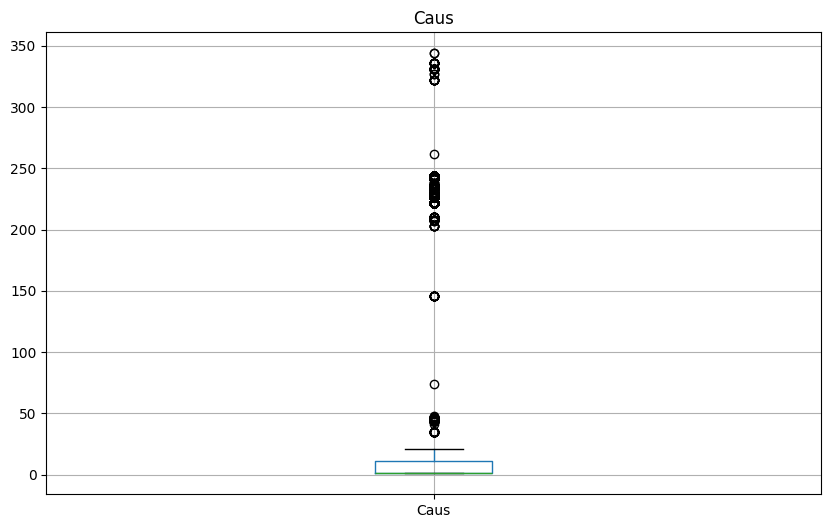

In [4]:
import matplotlib.pyplot as plt

# Replace 'column_name' with the name of the numerical column you're interested in
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    df.boxplot([column])
    plt.title(column)
    plt.show()


In [15]:
#do we want to do this for every numerical coumn we deem fit?

from scipy.stats import iqr
column = 'Importo'
quartile_1, quartile_3 = np.percentile(df[column], [25, 75])
iqr_value = iqr(df[column])

lower_bound = quartile_1 - (1.5 * iqr_value)
upper_bound = quartile_3 + (1.5 * iqr_value)

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(outliers)


        Unnamed: 0  A   Ateco  B    C    DataDoc  D    E    F    G  ... Rev  \
389            390  7  476220  N  NaN 2022-10-14  I  NaN  NaN  NaN  ...   N   
432            433  7  476220  N  NaN 2022-10-03  I  NaN  NaN  NaN  ...   N   
557            558  7  476220  N  NaN 2022-09-29  I  NaN  NaN  NaN  ...   N   
1748          1749  7  476220  N  NaN 2023-07-25  I  NaN  NaN  NaN  ...   N   
1756          1757  7  476220  N  NaN 2023-07-25  I  NaN  NaN  NaN  ...   N   
...            ... ..     ... ..  ...        ... ..  ...  ...  ...  ...  ..   
134381      234446  7  563000  N  9.0 2022-06-07  I  NaN  NaN  NaN  ...   N   
134382      234447  7  563000  N  9.0 2022-05-05  I  NaN  NaN  NaN  ...   N   
134383      234448  7  563000  N  9.0 2022-08-08  I  NaN  NaN  NaN  ...   N   
134384      234449  7  563000  N  9.0 2022-10-20  I  NaN  NaN  NaN  ...   N   
134385      234450  7  563000  N  9.0 2022-10-20  I  NaN  NaN  NaN  ...   N   

       CVia Rifamm  X Art2  Valore2 Art3  Valore3  

In [18]:
import pandas as pd

df = pd.read_excel('../data/luiss_data_anonym.xlsx')  

# Columns are numeric before calculating the median, coercing non-numeric to NaN
for column in ['B', 'D', 'Art1', 'Valore1', 'CMar', 'CTra', 'Rev', 'X']:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(df[column].median())

# Categorical column 'DescrizioneRiga', impute missing values with the mode
df['DescrizioneRiga'] = df['DescrizioneRiga'].fillna(df['DescrizioneRiga'].mode()[0])

# Save the cleaned dataset to a new file if needed
#df.to_excel('/path/to/your/cleaned_dataset.xlsx', index=False)  




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
